<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PDSH-cover-small.png">

*このノートブックには、Jake VanderPlas による [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) からの抜粋が含まれています。コンテンツは利用可能です [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do).*

※テキストは[CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode)で、コードは[CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode)で公開しています。このコンテンツが役立つと思われる場合は、[CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode) による作業のサポートを検討してください!*

<!--ナビゲーション-->
< [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb) | [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb) | [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb) >

<a href="https://colab.research.google.com/github/vitroid/PythonDataScienceHandbook/blob/ja/notebooks/02.06-Boolean-Arrays-and-Masks.ipynb"><img align="left" src ="https://colab.research.google.com/assets/colab-badge.svg" alt="Colab で開く" title="Google Colaboratory で開いて実行する"></a>


# 比較、マスク、およびブール論理

このセクションでは、NumPy 配列内の値を調べて操作するためのブール マスクの使用について説明します。
マスキングは、何らかの基準に基づいて配列内の値を抽出、変更、カウント、またはその他の方法で操作する場合に使用されます。たとえば、特定の値より大きいすべての値をカウントしたり、ある値を超えるすべての外れ値を削除したりする場合があります。しきい値。
NumPy では、多くの場合、これらのタイプのタスクを達成するための最も効率的な方法はブール マスキングです。

## 例: 雨の日を数える

特定の都市における 1 年間の毎日の降水量を表す一連のデータがあるとします。
たとえば、ここでは Pandas ([Chapter 3](03.00-Introduction-to-Pandas.ipynb) で詳しく説明されています) を使用して、2014 年のシアトル市の毎日の降雨統計を読み込みます。

In [1]:
import numpy as np
import pandas as pd

# use pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
inches.shape

(365,)

この配列には 365 個の値が含まれており、2014 年 1 月 1 日から 12 月 31 日までの 1 日あたりの降雨量がインチ単位で示されます。

最初の簡単な視覚化として、Matplotlib を使用して生成された雨の日のヒストグラムを見てみましょう (このツールについては、[Chapter 4](04.00-Introduction-To-Matplotlib.ipynb) で詳しく説明します)。

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles

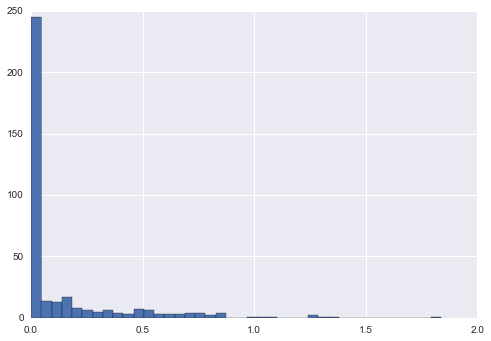

In [3]:
plt.hist(inches, 40);

このヒストグラムは、データがどのように見えるかについての一般的なアイデアを提供します。その評判にもかかわらず、シアトルでは 2014 年に測定された降雨量がゼロに近い日が圧倒的に多く見られました。
しかし、これは私たちが見たいと思っている情報をうまく伝えることができません。これらの雨の日の平均降水量は? 0.5 インチ以上の雨が降った日は何日ありましたか?

### データを掘り下げる

これに対する 1 つのアプローチは、これらの質問に手動で回答することです。データをループし、値が望ましい範囲内にあるのを確認するたびにカウンターをインクリメントします。
この章全体で説明する理由により、このようなアプローチは、コードを記述する時間と結果を計算する時間の両方の観点から非常に非効率的です。
[Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb) で、NumPy の ufunc をループの代わりに使用して、配列で要素単位の算術演算を高速に実行できることを確認しました。同様に、他の ufunc を使用して配列に対して要素ごとの *比較* を行うことができ、その結果を操作して質問に答えることができます。
今のところデータは脇に置いておき、これらの種類の質問にすばやく答えるために *マスキング* を使用する NumPy の一般的なツールについて説明します。

## ufunc としての比較演算子

[Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb) では、ufunc を導入し、特に算術演算子に焦点を当てました。配列で + 、 - 、 * 、 / などを使用すると、要素単位の操作になることがわかりました。
NumPy は要素ごとの ufunc として ``<`` (より小さい) や ``>`` (より大きい) などの比較演算子も実装しています。
これらの比較演算子の結果は、常に Boolean データ型の配列になります。
6 つの標準比較演算がすべて利用可能です。

In [4]:
x = np.array([1, 2, 3, 4, 5])

In [5]:
x < 3  # less than

array([ True,  True, False, False, False], dtype=bool)

In [6]:
x > 3  # greater than

array([False, False, False,  True,  True], dtype=bool)

In [7]:
x <= 3  # less than or equal

array([ True,  True,  True, False, False], dtype=bool)

In [8]:
x >= 3  # greater than or equal

array([False, False,  True,  True,  True], dtype=bool)

In [9]:
x != 3  # not equal

array([ True,  True, False,  True,  True], dtype=bool)

In [10]:
x == 3  # equal

array([False, False,  True, False, False], dtype=bool)

2 つの配列を要素単位で比較し、複合式を含めることもできます。

In [11]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False], dtype=bool)

算術演算子の場合と同様に、比較演算子は NumPy で ufunc として実装されます。例えば ​​x < 3 と書くと、NumPy は内部的に np.less(x, 3) を使います。
比較演算子とそれに相当する ufunc の概要を以下に示します。

| |オペレーター |同等の ufunc ||オペレーター |同等の ufunc |
|---------------|---------------------||---------------|---------------------|
|``==`` |``np.equal`` ||``!=`` |``np.not_equal`` |
|``<`` |``np.less`` ||``<=`` |``np.less_equal`` |
|``>`` |``np.greater`` ||``>=`` |``np.greater_equal`` |

算術 ufunc の場合と同様に、これらは任意のサイズと形状の配列で機能します。
以下は 2 次元の例です。

In [12]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [13]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]], dtype=bool)

いずれの場合も、結果はブール配列であり、NumPy はこれらのブール結果を操作するための簡単なパターンを多数提供します。

## ブール配列の操作

ブール配列を指定すると、実行できる便利な操作が多数あります。
前に作成した 2 次元配列 ``x`` を使用します。

In [14]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


### エントリのカウント

ブール配列の ``True`` エントリの数を数えるには、``np.count_nonzero`` が便利です:

In [15]:
# how many values less than 6?
np.count_nonzero(x < 6)

8

6 未満の配列エントリが 8 つあることがわかります。
この情報を取得する別の方法は、``np.sum`` を使用することです。この場合、 ``False`` は ``0`` として解釈され、 ``True`` は ``1`` として解釈されます:

In [16]:
np.sum(x < 6)

8

sum() の利点は、他の NumPy 集計関数と同様に、この合計を行または列に沿って実行できることです。

In [17]:
# how many values less than 6 in each row?
np.sum(x < 6, axis=1)

array([4, 2, 2])

これは、行列の各行で 6 未満の値の数をカウントします。

一部またはすべての値が true かどうかをすばやく確認したい場合は、(ご想像のとおり) ``np.any`` または ``np.all`` を使用できます。

In [18]:
# are there any values greater than 8?
np.any(x > 8)

True

In [19]:
# are there any values less than zero?
np.any(x < 0)

False

In [20]:
# are all values less than 10?
np.all(x < 10)

True

In [21]:
# are all values equal to 6?
np.all(x == 6)

False

``np.all`` と ``np.any`` は、特定の軸に沿って使用することもできます。例えば：

In [22]:
# are all values in each row less than 8?
np.all(x < 8, axis=1)

array([ True, False,  True], dtype=bool)

ここでは、1 行目と 3 行目のすべての要素が 8 未満ですが、2 行目はそうではありません。

最後に、簡単な警告: [Aggregations: Min, Max, and Everything In Between](02.04-Computation-on-arrays-aggregates.ipynb) で述べたように、Python には組み込みの ``sum()``、``any()``、および ``all()`` 関数があります。これらは NumPy バージョンとは異なる構文を持ち、特に多次元配列で使用すると失敗したり、意図しない結果を生成したりします。これらの例では、 np.sum() 、 np.any() 、 np.all() を使用していることを確認してください!

### ブール演算子

たとえば、降水量が 4 インチ未満のすべての日、または降水量が 2 インチを超えるすべての日を数える方法については、既に説明しました。
しかし、降水量が 4 インチ未満および 1 インチを超えるすべての日について知りたい場合はどうでしょうか。
これは、Python の *ビットごとの論理演算子*、``&``、``|``、``^``、および ``~`` によって実現されます。
標準の算術演算子と同様に、NumPy はこれらを ufunc としてオーバーロードし、(通常はブール) 配列で要素ごとに機能します。

たとえば、この種の複合的な質問には次のように対処できます。

In [23]:
np.sum((inches > 0.5) & (inches < 1))

29

したがって、降水量が 0.5 ～ 1.0 インチの日数が 29 日あることがわかります。

ここで括弧が重要であることに注意してください。演算子の優先順位規則により、括弧を削除すると、この式は次のように評価され、エラーが発生します。

``` python
inches > (0.5 & inches) < 1
```

*A AND B* と *NOT (NOT A OR NOT B)* の同等性を使用して (入門論理コースを受講した場合は覚えているかもしれません)、同じ結果を別の方法で計算できます。

In [24]:
np.sum(~( (inches <= 0.5) | (inches >= 1) ))

29

配列で比較演算子とブール演算子を組み合わせると、広範囲にわたる効率的な論理演算が可能になります。

次の表は、ビットごとのブール演算子とそれに相当する ufunc をまとめたものです。

| |オペレーター |同等の ufunc ||オペレーター |同等の ufunc |
|---------------|---------------------||---------------|---------------------|
|``&`` |``np.bitwise_and`` ||| |``np.bitwise_or`` |
|``^`` |``np.bitwise_xor`` ||``~`` |``np.bitwise_not`` |

これらのツールを使用して、気象データに関するさまざまな質問に答え始めるかもしれません。
マスキングと集計を組み合わせたときに計算できる結果の例を次に示します。

In [25]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) &
                                                (inches < 0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75


## マスクとしてのブール配列

前のセクションでは、ブール配列で直接計算された集計について説明しました。
より強力なパターンは、ブール配列をマスクとして使用して、データ自体の特定のサブセットを選択することです。
前の ``x`` 配列に戻って、たとえば 5 より小さい配列内のすべての値の配列が必要だとします。

In [26]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

すでに見たように、この条件のブール配列を簡単に取得できます。

In [27]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]], dtype=bool)

配列からこれらの値を*選択*するには、このブール配列にインデックスを付けるだけです。これは *マスキング* 操作として知られています。

In [28]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

返されるのは、この条件を満たすすべての値で満たされた 1 次元配列です。つまり、マスク配列が ``True`` である位置のすべての値です。

その後、これらの値を自由に操作できます。
たとえば、シアトルの雨のデータに関連するいくつかの統計を計算できます。

In [29]:
# construct a mask of all rainy days
rainy = (inches > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2014 (inches):   ",
      np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):  ",
      np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
      np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",
      np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):    0.194881889764
Median precip on summer days in 2014 (inches):   0.0
Maximum precip on summer days in 2014 (inches):  0.850393700787
Median precip on non-summer rainy days (inches): 0.200787401575


ブール演算、マスキング演算、集計を組み合わせることで、データセットに関するこの種の質問にすばやく答えることができます。

## 余談: キーワード and/or と演算子 &/| の使用

混乱の一般的なポイントの 1 つは、一方でキーワード ``and`` と ``or`` と、他方で演算子 ``&`` と ``|`` の違いです。
いつどちらを使用しますか?

違いは次のとおりです: ``and`` と ``or`` は *オブジェクト全体* の真偽を判断しますが、 ``&`` と ``|`` は *各オブジェクト内のビット* を参照します。

``and`` または ``or`` を使用する場合、Python にオブジェクトを単一のブール型エンティティとして扱うように要求するのと同じです。
Python では、ゼロ以外のすべての整数が True として評価されます。したがって：

In [30]:
bool(42), bool(0)

(True, False)

In [31]:
bool(42 and 0)

False

In [32]:
bool(42 or 0)

True

整数に ``&`` と ``|`` を使用すると、式は要素のビットに作用し、数値を構成する個々のビットに *and* または *or* を適用します。

In [33]:
bin(42)

'0b101010'

In [34]:
bin(59)

'0b111011'

In [35]:
bin(42 & 59)

'0b101010'

In [36]:
bin(42 | 59)

'0b111011'

結果を得るために、バイナリ表現の対応するビットが比較されることに注意してください。

NumPy にブール値の配列がある場合、これは ``1 = True`` および ``0 = False`` であるビットの文字列、および ``&`` および `` |`` 上記と同様に動作します。

In [37]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True], dtype=bool)

これらの配列で ``or`` を使用すると、配列オブジェクト全体の真偽を評価しようとしますが、これは明確に定義された値ではありません。

In [38]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

同様に、特定の配列に対してブール式を実行する場合は、 or や and ではなく | または & を使用する必要があります。

In [39]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False, False], dtype=bool)

配列全体の真偽を評価しようとすると、前に見たのと同じ ``ValueError`` が返されます:

In [40]:
(x > 4) and (x < 8)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

したがって、これを覚えておいてください: ``and`` と ``or`` はオブジェクト全体に対して単一のブール値評価を実行しますが、 ``&`` と ``|`` はコンテンツ (個々のビットまたはバイト) に対して複数のブール値評価を実行します。 ) オブジェクトの。
Boolean NumPy 配列の場合、ほとんどの場合、後者が望ましい操作です。

<!--ナビゲーション-->
< [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb) | [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb) | [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb) >

<a href="https://colab.research.google.com/github/vitroid/PythonDataScienceHandbook/blob/ja/notebooks/02.06-Boolean-Arrays-and-Masks.ipynb"><img align="left" src ="https://colab.research.google.com/assets/colab-badge.svg" alt="Colab で開く" title="Google Colaboratory で開いて実行する"></a>
